**Wilbert Bryan Wibowo - 0706022210017**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier

## Load Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/WilbertBryan/dataset/refs/heads/main/Bank.csv', delimiter=';')
data.head()

# Mengambil data menggunakan read_csv dan menampilkan 5 data teratas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [3]:
data.replace('unknown', np.nan, inplace=True)
data.isnull().sum()
# mereplace ? menjadi missing value dan mengecek total missing value di setiap variabel
# job, contact, dan poutcome memiliki missing value

,0
age,0
job,38
marital,0
education,187
default,0
balance,0
housing,0
loan,0
contact,1324
day,0


In [4]:
data['job'].replace({'admin.': 'management'}, inplace=True)
# mengganti admin menjadi management

<ipython-input-4-2be36f22d1ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['job'].replace({'admin.': 'management'}, inplace=True)


In [5]:
data.info()
# terdapat 4521 data dengan 17 column dan yang di predict adalah 'y'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   816 non-null    object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
data.describe()
# menampilkan deskriptif statistik

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
print("Job: ", data['job'].unique())
print("Contact: ",data['contact'].unique())
print("Poutcome: ",data['poutcome'].unique())
# menampilkan unique value dari job, contact, dan poutcome

Job:  ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'student' 'housemaid' 'retired' nan]
Contact:  ['cellular' nan 'telephone']
Poutcome:  [nan 'failure' 'other' 'success']


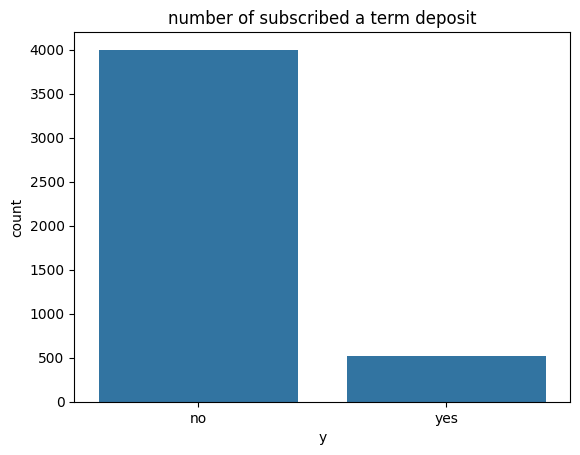

In [8]:
sns.countplot(x='y', data=data)
plt.title("number of subscribed a term deposit")
plt.show()

# data no lebih banyak di bandingkan yes. no memiliki sekitar 4000 data dan yang yes memiliki 500 data

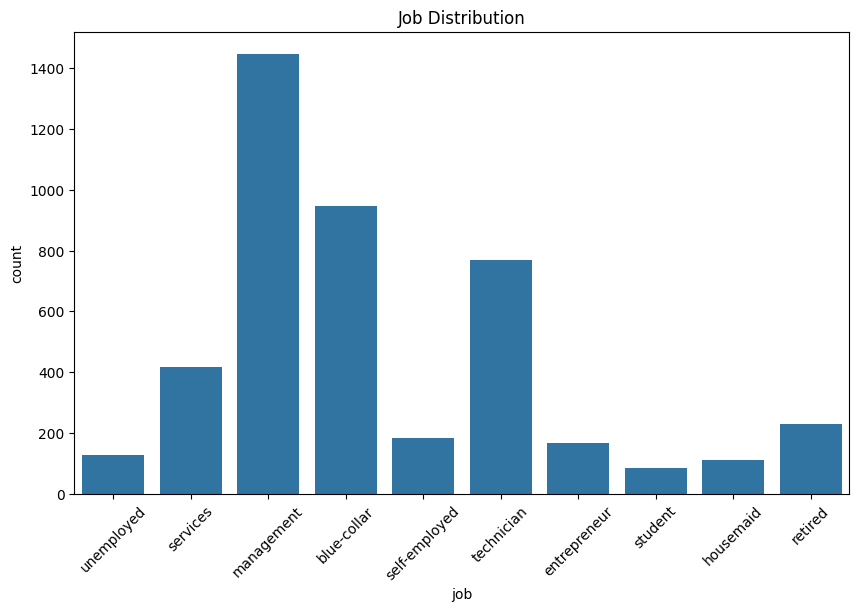

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=data, width=0.8)  # Adjust width for gap between bars
plt.title("Job Distribution")
plt.xticks(rotation=45)  # Rotate x labels for better readability, if necessary
plt.show()

# management memiliki data terbanyak di job distribution

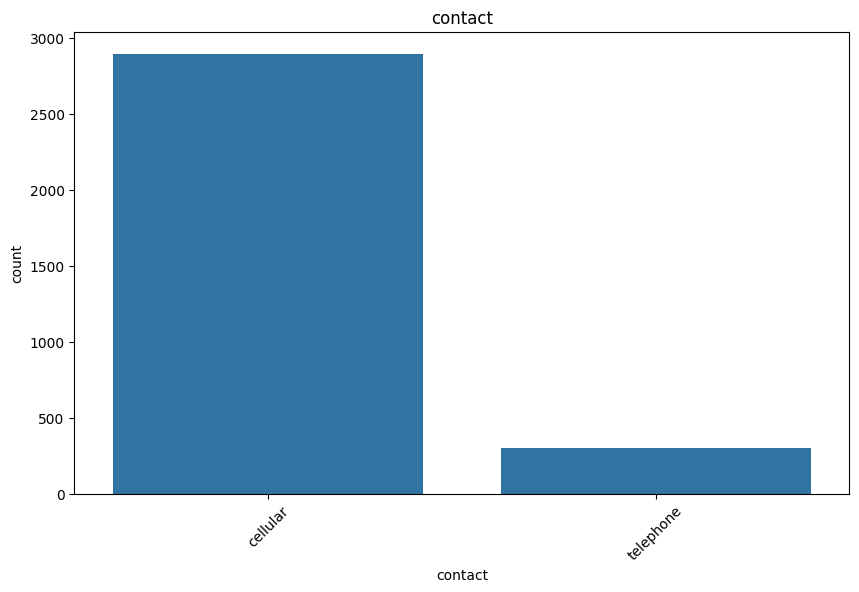

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', data=data, width=0.8)  # Adjust width for gap between bars
plt.title("contact")
plt.xticks(rotation=45)  # Rotate x labels for better readability, if necessary
plt.show()
# cellular memiliki data jauh lebih banyak dibandingkan telephone

In [11]:
label_encoder = LabelEncoder()

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome','month','y']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

data.head()

# mengubah column yang string menjadi int dengan menggunakan label encoder dan menampilkan 5 data teratas.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,1,0,1787,0,0,0,19,10,79,1,-1,0,1,0
1,33,7,1,2,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,3,2,3,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,3,1,3,0,1476,1,1,1,3,6,199,4,-1,0,1,0
4,59,0,1,2,0,0,1,0,1,5,8,226,1,-1,0,1,0


In [21]:
# Specify the columns you want to fill with mode
columns_to_fill = ['job', 'contact', 'poutcome']

# Fill null values with the mode for the specified columns only
for column in columns_to_fill:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Mengisi coloumn yang null menjadi mode

<ipython-input-21-82e7dee6c625>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
<ipython-input-21-82e7dee6c625>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

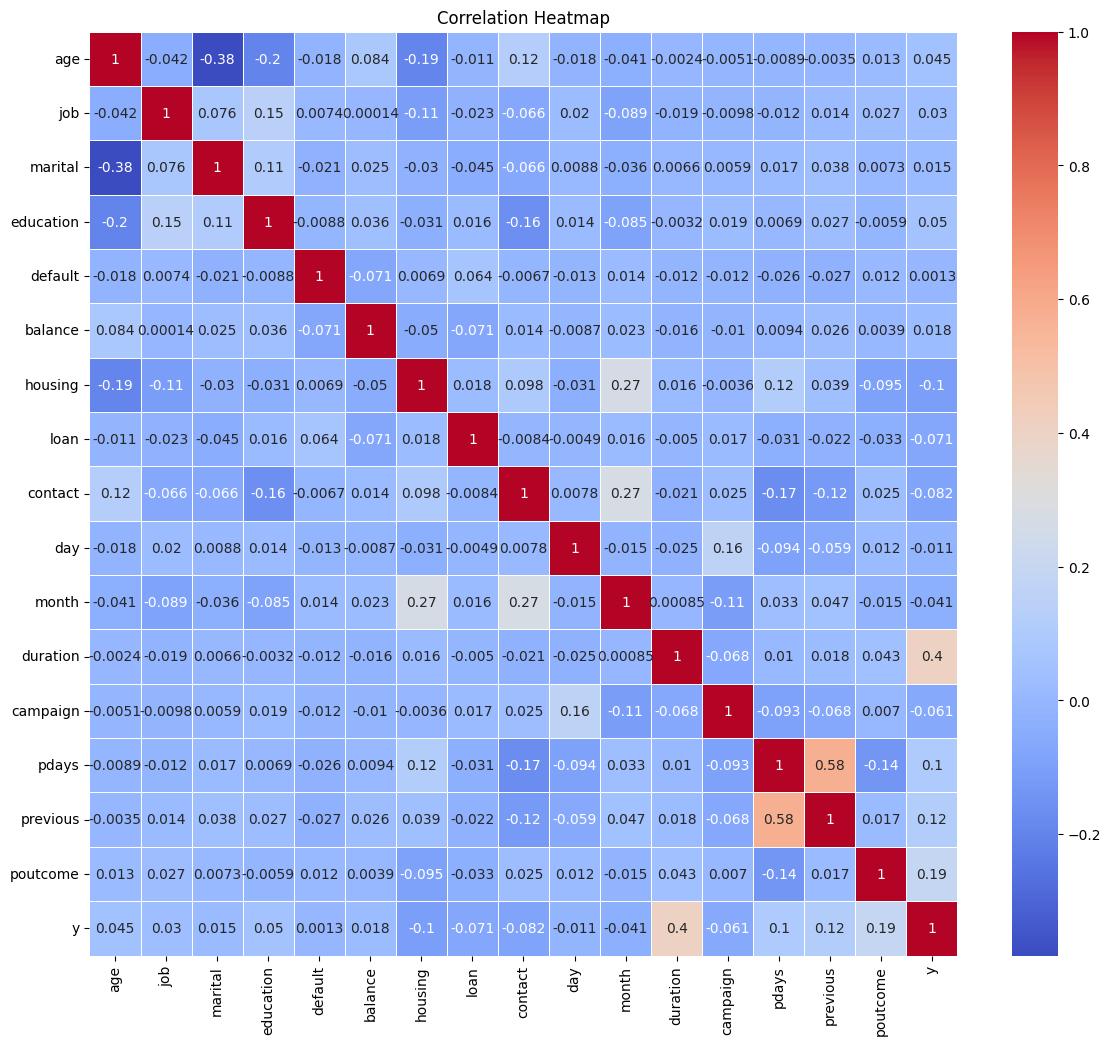

In [22]:
correlation_matrix = data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# menampilkan korelasi antar variabel.
# y dengan duration memiliki korelasi positif dan memiliki korealsi 0.4
# pdays, previous, dan poutcome memiliki korelasi diatas 0.1 dengan variabel y

## Machine Learning (Split Data)

In [23]:
X = data[['duration', 'pdays', 'previous','poutcome']]
y = data['y']

# menggunakan X dengan korelasi diatas 0.1 dari confussion matrix
# y adalah target variabel

In [24]:
smote_enn = SMOTEENN(random_state=42)

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

# menggunakan smoteen untuk menghasilkan sampel sintetis yang lebih mewakili kelas minoritas dan mengurangi keberadaan sampel yang
# tidak sesuai atau menyimpang dari pola umum dalam dataset

Class distribution after SMOTEEN:
y
0    2964
1    2177
Name: count, dtype: int64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# memisiah data dengan 20% untuk testing dan 80% untuk training

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [32]:
# a
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

# Membuat model random forest dan menggunakan estimator 100

RandomForestClassifier(random_state=42)

In [33]:
# b
y_pred_rf = model_rf.predict(X_test)
# membuat y_pred_rf untuk memprediksi X_test

In [34]:
# c
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Model accuracy score with random forest:", accuracy_rf)

# Akurasi entropy sebesar 0.992 atau 99.2%

Model accuracy score with random forest: 0.9922254616132167


In [35]:
# d
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix Random Forest:")
print(cm_rf)

# Menampilkan confusion matrix random forest
# TP: 587
# FN: 7
# FP: 1
# TF: 434

Confusion Matrix Random Forest:
[[587   7]
 [  1 434]]


In [36]:
# e
report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest:")
print(report_rf)

# Menampilkan classification report random forest

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       594
           1       0.98      1.00      0.99       435

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029



In [ ]:
# f

# precesion pada class 0 memiliki nilai yang sempurna 100% dan class 1 memiliki nilai yang sempurna 100%
# recall recall dan f1-score dari class 0 memiliki nilai 99%
# class 1 precision memiliki nilai 98% dan f1-score 99%
# akurasi dari menggunakan random forest 99%
# dengan menggunakan random forest dan x menggunakan duration, pdays, previous, poutcome yang memiliki akurasi tinggi dan
# smoteen gabungan smote untuk mem-balance data yang minoritas dan enn membersihkan overlapping di data
# dapat menghasilkan classification report yang bagus.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [39]:
# a
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

# membuat model gradient boosting classifier dengan menggunakan random state 42

GradientBoostingClassifier(random_state=42)

In [40]:
# b
y_pred_gb = model_gb.predict(X_test)
# membuat y_pred_gb untuk memprediksi X_test

In [41]:
# c
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Model accuracy score with gradient boosting classifier:", accuracy_gb)

# Akurasi entropy sebesar 0.983 atau 98.3%

Model accuracy score with gradient boosting classifier: 0.9834791059280855


In [42]:
# d
cm_gb = confusion_matrix(y_test, y_pred_gb)

print("Confusion Matrix gradient boosting classifier:")
print(cm_gb)

# Menampilkan confusion matrix gradient boosting classifier
# TP: 583
# FN: 11
# FP: 6
# TF: 429

Confusion Matrix Random Forest:
[[583  11]
 [  6 429]]


In [43]:
# e
report_gb = classification_report(y_test, y_pred_gb)

print("Classification Report gradient boosting classifier:")
print(report_gb)

# Menampilkan classification report gradient boosting classifier

Classification Report gradient boosting classifier:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       594
           1       0.97      0.99      0.98       435

    accuracy                           0.98      1029
   macro avg       0.98      0.98      0.98      1029
weighted avg       0.98      0.98      0.98      1029



In [ ]:
# f
# class 0 memiliki precision dan f1 score 99% dan recall 98%
# class 1 memiliki precision 97%, recall 99%, f1-score 98%
# akurasinya adalah 98%
# Gradient Boosting Classifier ini memiliki performa yang sangat baik dalam
# mengklasifikasikan kedua kelas dengan keseimbangan antara precision dan recall yang tinggi.
# namun random forest lebih baik jika di bandingkan gradient boosting clasifier.